In [1]:
import pandas as pd
import scipy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\umesh\\dataset\\population_diabetes.csv")

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#checking data type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#replacing nan value with 0
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)

In [8]:
#Fit the numerical data to Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)
df = pd.DataFrame(X, columns=df.columns)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


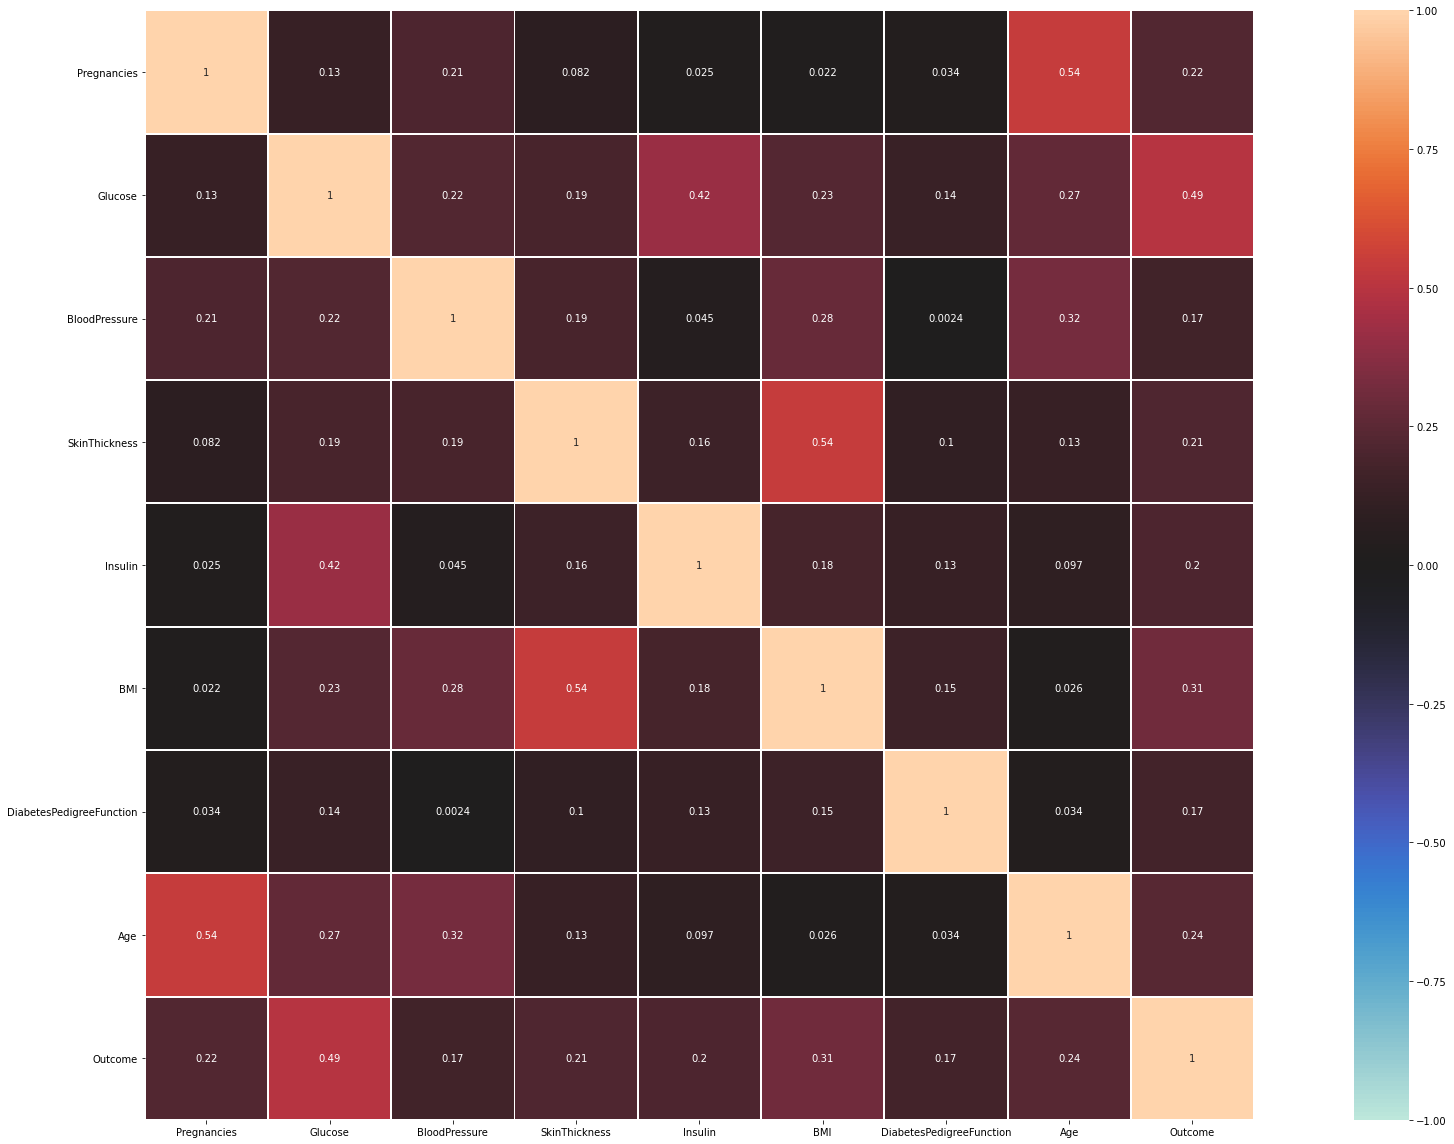

In [10]:
# showing correlation matrix
df_corr = df.corr().abs()
plt.figure(figsize=(28,16))
sns.heatmap(df_corr,vmin=-1,vmax=+1,annot=True,square=True,center=0,fmt=".2g",linewidth=1)
plt.tight_layout()

In [11]:
#descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df_test=pd.read_csv("C:\\Users\\umesh\\dataset\\sample.xlsx - Sheet1.csv")
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               42 non-null     int64  
 1   Glucose                   42 non-null     int64  
 2   BloodPressure             42 non-null     int64  
 3   SkinThickness             42 non-null     int64  
 4   Insulin                   42 non-null     int64  
 5   BMI                       42 non-null     float64
 6   DiabetesPedigreeFunction  42 non-null     float64
 7   Age                       42 non-null     int64  
 8   Outcome                   42 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 3.1 KB


In [14]:
#replacing nan value with 0
df_test['SkinThickness'] = df_test['SkinThickness'].replace(0,np.nan)
df_test['Insulin'] = df_test['Insulin'].replace(0,np.nan)
df_test['Glucose'] = df_test['Glucose'].replace(0,np.nan)
df_test['BloodPressure'] = df_test['BloodPressure'].replace(0,np.nan)
df_test['BMI'] = df_test['BMI'].replace(0,np.nan)

In [15]:
#Fit the numerical data to Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df_test)
X = imputer.transform(df_test)
df_test = pd.DataFrame(X, columns=df_test.columns)
df_test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,146.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,146.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.5,146.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,32.5,146.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,74.0,32.5,146.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,32.5,146.0,32.9,0.232,54.0,1.0


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               42 non-null     float64
 1   Glucose                   42 non-null     float64
 2   BloodPressure             42 non-null     float64
 3   SkinThickness             42 non-null     float64
 4   Insulin                   42 non-null     float64
 5   BMI                       42 non-null     float64
 6   DiabetesPedigreeFunction  42 non-null     float64
 7   Age                       42 non-null     float64
 8   Outcome                   42 non-null     float64
dtypes: float64(9)
memory usage: 3.1 KB


In [17]:
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5.500000,126.857143,73.404762,31.738095,171.309524,32.416667,0.502357,37.880952,0.523810
std,3.556169,31.740235,13.584531,7.444296,128.946479,6.222576,0.408390,11.487432,0.505487
min,0.000000,78.000000,30.000000,11.000000,54.000000,19.900000,0.134000,21.000000,0.000000
25%,3.000000,103.000000,66.500000,30.250000,146.000000,27.725000,0.249500,29.250000,0.000000
50%,5.000000,118.500000,74.000000,32.500000,146.000000,32.900000,0.409000,33.000000,1.000000
75%,8.000000,144.500000,81.500000,34.500000,146.000000,36.975000,0.578000,49.000000,1.000000
max,13.000000,197.000000,96.000000,47.000000,846.000000,45.800000,2.288000,60.000000,1.000000


In [18]:
#Let's find the M, mean of BP column(Blood Pressure) in a given data frame
mu=121.656250
std=30.438286
MeanofBpsample = np.average( df_test['BloodPressure'])
print("Mean Of BP Column", MeanofBpsample)
SE= std/np.sqrt(df_test.size)  #sf.size id the total size of
print("Std of Bp",SE )
# Z_norm_deviate =  sample_mean - population_mean /std_error_bp
Z_norm_deviate = (MeanofBpsample - mu) / SE
print("Normal Deviate Z Value: ", Z_norm_deviate)

Mean Of BP Column 73.4047619047619
Std of Bp 1.565576498968081
Normal Deviate Z Value:  -30.820268525391207


In [19]:
# We will be using scipy stats normal survival function sf
#Here we mulitply the sf fucntion with 2 for two sided p value #calcultion , a two tail test
p_value = scipy.stats.norm.sf(abs(Z_norm_deviate))*2 
print('p values' , p_value)
if p_value > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

p values 1.402434227586484e-208
Samples are likely drawn from different distributions (reject H0)


In [20]:
Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = df_test['BloodPressure'] 
estimated_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df_test.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(df_test['BloodPressure']).mean()

SE = estimated_std / np.sqrt(df_test.size)

T_Statistic = (( sample_avg_bp - Mu) / SE)

pvalue = st.t.sf(np.abs(T_Statistic), df_test.size-1)*2
print("Estimated Population Stand Dev" , estimated_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , SE)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

Estimated Population Stand Dev 4.479875142614939
Sample Avg BP :  73.4047619047619
Standard Error:  0.23041991397246311
T Statistic 4.360568873756149
Pval 1.6759367461195434e-05
Samples are likely drawn from different distributions (reject H0)
